# Phase Estimation and Quantum Fourier Transforms

## Imports and Dependencies

In [1]:
import pennylane as qml
from pennylane import numpy as np

## Mathematical Introduction

Various versions of the Fourier transform show up over and over again in mathematics, physics, computer science, engineering, and other areas. It is one of the most useful mathematical tools in existence. One such version, the **discrete Fourier transform** can be computed much faster on quantum computers than on classical computers. The discrete Fourier transform takes as input a complex vector 

\begin{align}
x = 
\begin{pmatrix}
x_0 \\ 
x_1 \\ 
x_2 \\
\vdots \\ 
x_{N-2} \\
x_{N-1}
\end{pmatrix}.
\end{align}

Each entry of the output vector $y$ is given by

\begin{align}
y_k = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} x_je^{2 \pi ijk/N}.
\end{align}

The output is a complex vector

\begin{align}
y = 
\frac{1}{\sqrt{N}}
\begin{pmatrix}
\sum_{j=0}^{N-1} x_je^{2\pi ij0/N} \\
\sum_{j=0}^{N-1} x_je^{2\pi ij1/N} \\
\sum_{j=0}^{N-1} x_je^{2\pi ij2/N} \\
\vdots \\
\sum_{j=0}^{N-1} x_je^{2\pi ij(N-2)/N} \\
\sum_{j=0}^{N-1} x_je^{2\pi ij(N-1)/N}
\end{pmatrix}
\end{align}

The **quantum Fourier transform** is the exact same transformation but the notation is generally different. We generally compute the quantum Fourier transform on a set of orthonormal basis state vectors $|0\rangle, |1\rangle, ..., |N-1\rangle$. The linear operator defining the transform is given by the action on basis states

\begin{align}
|j\rangle \mapsto \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1} e^{2\pi ijk/N}|k\rangle.
\end{align}

This can be written on arbitrary states,

\begin{align}
\sum_{j=0}^{N-1}x_j|j\rangle \mapsto \sum_{k=0}^{N-1} y_k|k\rangle
\end{align}

where each amplitude $y_k$ is the discrete Fourier transform of $x_j$. The quantum Fourier transform is unitary. Taking $N = 2^n$, for $n$ qubits gives us the orthonormal (computational) basis 

\begin{align}
|0\rangle, |1\rangle, ..., |2^{n}-1\rangle.
\end{align}

Each of the computational basis states can be represented in binary

\begin{align}
j = j_1j_2 \cdots j_n
\end{align}

where each $j_k$ is either $0$ or $1$, and the corresponding binary vector is $|j_1j_2 \cdots j_n\rangle$. The quantum Fourier transform on one of these $n$-qubit vectors can be written as,

\begin{align}
|j_1j_2 \cdots j_n \rangle = \frac{\left(|0\rangle +e^{2\pi i0.j_n}|1\rangle\right) \otimes \left(|0\rangle +e^{2\pi i0.j_{n-1}j_n}|1\rangle\right) \otimes \cdots \otimes \left(|0\rangle +e^{2\pi i0.j_1j_2 \cdots j_n}|1\rangle\right)}{2^{n/2}}
\end{align}

In the above, we use the notation

\begin{align}
0.j_lj_{l+1} \cdots j_n = \frac{j+l}{2} + \frac{j_{l+1}}{2^2} + \cdots + \frac{j_n}{2^{m-l+1}}
\end{align}

Let's have a look at an example on a four qubit system. The basis states are, 

\begin{align}
|j_1j_2j_3j_4 \rangle
\end{align}

where $j_k$ is either $0$ or $1$. We have,

\begin{align}
0.j_3 &= \frac{j_3}{2} \\
0.j_2j_3 &= \frac{j_2}{2} + \frac{j_3}{4} \\
0.j_1j_2j_3 &= \frac{j_1}{2} + \frac{j_2}{4} + \frac{j_3}{8} \\
0.j_0j_1j_2j_3 &= \frac{j_0}{2} + \frac{j_1}{4} + \frac{j_2}{8} + \frac{j_3}{16} \\
\end{align}

The quantum Fourier transform acts as follows:

\begin{align}
|j_1j_2j_3j_4 \rangle \mapsto \frac{1}{\sqrt{2^{4/2}}}
\left(|0\rangle + e^{2 \pi i 0.j4}|1\rangle \right) \otimes 
\left(|0\rangle + e^{2 \pi i 0.j_3j4}|1\rangle \right) \otimes 
\left(|0\rangle + e^{2 \pi i 0.j_2j_3j4}|1\rangle \right) \otimes 
\left(|0\rangle + e^{2 \pi i 0.j_1j_2j_3j4}|1\rangle \right) 
\end{align}

To compose a quantum circuit that calculates the quantum Fourier transform we use the operators

\begin{align}
R_k = 
\begin{pmatrix}
1 & 0 \\
0 & e^{2\pi i/2^k}
\end{pmatrix}.
\end{align}

The circuit computing the QFT on four qubits is given by,

![qft.png](qft.png)

In this example, the $R_k$ gates are:

\begin{align}
R_1 = \begin{pmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^0}
\end{pmatrix} = 
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}, \quad 
R_2 = \begin{pmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^2}
\end{pmatrix}, \quad 
R_3 = \begin{pmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^3}
\end{pmatrix}, \quad 
R_4 = \begin{pmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^4}
\end{pmatrix}.
\end{align}

\begin{quantikz}
\lstick{\ket{j_1}} \qw & \gate{H} & \gate{R_2} & \gate{R_3} & \gate{R_4} & \qw        & \qw      & \qw        & \qw      & \qw         & \qw & \qw \\
\lstick{\ket{j_2}} \qw & \qw      & \ctrl{-1}  & \qw        & \qw        & \gate{H} & \gate{R_2} & \gate{R_3} & \qw      & \qw         & \qw & \qw \\       
\lstick{\ket{j_3}} \qw & \qw      & \qw        & \ctrl{-2}  & \qw        & \qw      & \ctrl{-1}  & \qw        & \gate{H} & \gate{R_2}  & \qw & \qw \\
\lstick{\ket{j_4}} \qw & \qw      & \qw        & \qw        & \ctrl{-3}  & \qw      & \qw        & \ctrl{-2}  & \qw      & \ctrl{-1}   & \gate{H} & \qw
\end{quantikz}

Since the $R_1$ gate is simply the identity, it usually doesn't show up in code or circuit diagrams as it does nothing to any of the qubits. In general, we call the gate $R_k$ for $k=1, 2, 3, 4$ a $U_1$-gate. The $U_1$ gates are always of the form

\begin{align}
\begin{pmatrix}
1 & 0 \\
0 & e^{i \lambda}
\end{pmatrix}
\end{align}

where $\lambda$ is generally some angle $\lambda = 2\pi/n$. For us the angle is of the form $\lambda = 2\pi/2^{k-1}$, where again, $k = 1, 2, 3, 4$ is the index of the gates $R_k$. Now, in the Quantum Fourier Transform we will need the controlled-$U_1$ gates, 

\begin{align}
|0\rangle \langle 0| \otimes I + |1\rangle \langle 1| \otimes U_1 =  
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i \lambda}
\end{pmatrix}. 
\end{align}

This of course operates on a two-qubit system, so modifying it for a four-qubit system means the matrix will be a little different. The term $|0\rangle \langle 0| \otimes I$ always operates on the control qubit, and the term $|1\rangle \langle 1| \otimes U_1$ always operates on the target qubit. As an example in a four qubit system, we might have the first qubit be the target qubit, and the fourth qubit the control qubit. In this case we would have an operator:

\begin{align}
\left(|0\rangle \langle 0| \otimes U_1 \otimes I \otimes I\right) + \left(|1\rangle \langle 1| \otimes I \otimes I \otimes I\right)
\end{align}

This would apply the $U_1$ gate to the first qubit, with the control gate on the fourth qubit, and the identity gates on the second and third qubit. The more general circuit for $n$ qubits has layers that are similar. 

### Exercises

1. Draw the quantum circuit that computes the quantum Fourier transform on two qubits. 
2. Use Python to define the following gate:

\begin{align}
CS = \begin{pmatrix}
S & 0 \\
0 & X 
\end{pmatrix} = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & e^{2 \pi i/2^2} & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix} = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & i & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}
\end{align}

3. Use Python to define the four basis states $|00\rangle$, $|01\rangle$, $|10\rangle$, and $|11\rangle$ as four dimensional unit vectors. For example,

\begin{align}
|00\rangle = 
\begin{pmatrix}
1 \\
0 \\
0 \\
0
\end{pmatrix}
\end{align}

4. Define the gate $H \otimes I$ and $I \otimes H$ in Python, where $H$ is the Hadamard gate. 
5. Use the gates and basis states above to compute the quantum Fourier transform on the four basis states. 
6. Draw the quantum circuit that computes the quantum Fourier transform on three qubits. 

In general, we can write the quantum Fourier transform as a matrix operator, 

\begin{align}
F_N = \frac{1}{\sqrt{N}}
\begin{pmatrix}
1 & 1 & 1 & 1 & \cdots & 1 \\
1 & \omega & \omega^2 & \omega^3 & \cdots & \omega^{N-1} \\
1 & \omega^2 & \omega^4 & \omega^6 & \cdots & \omega^{2(N-1)} \\
1 & \omega^3 & \omega^6 & \omega^9 & \cdots & \omega^{3(N-1)} \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \omega^{N-1} & \omega^{2(N-1)} & \omega^{3(N-1)} & \cdots & \omega^{(N-1)(N-1)}
\end{pmatrix}
\end{align}

where $\omega = e^{2 \pi i/N}$. As an example, we can write the two qubit QFT as

\begin{align}
F_4 = \frac{1}{2}
\begin{pmatrix}
1 & 1 & 1 & 1 \\
1 & i & -1 & -i \\
1 & -1 & 1 & -1 \\
1 & -i & -1 & i
\end{pmatrix}
\end{align}

We can define the four basis states $|00\rangle, |01\rangle, |10\rangle, |00\rangle$ and $F_4$ in Python:

In [2]:
d = np.matrix([[1],
               [0]])

u = np.matrix([[0],
               [1]])

dd = np.kron(d,d)
du = np.kron(d,u)
ud = np.kron(u,d)
uu = np.kron(u,u)

F = np.matrix([[1,1,1,1],
               [1,1j,-1,-1j],
               [1,-1,1,-1],
               [1,-1j,-1,1j]])

In [3]:
print(F*dd)

[[1.+0.j]
 [1.+0.j]
 [1.+0.j]
 [1.+0.j]]


7. Compute $F_4(|01\rangle)$. 
8. Compute $F_4(|10\rangle)$. 
9. Compute $F_4(|00\rangle)$. 
10. Write down the three qubit quantum Fourier transform $F_8$ in matrix form.

## The Quantum Fourier Transform in Qiskit

### Imports and Dependencies

In [4]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi
from qiskit import *

First, let's define a quantum register. 

In [6]:
q = QuantumRegister(4)

Now, we can define the quantum circuit with four qubits for the Quantum Fourier Transform. We include barriers between sequences of gates according to the target qubit for the controlled-$U_1$ gates given by the four matrices

\begin{align}
R_1 = \begin{pmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^0}
\end{pmatrix} = 
\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}, \quad 
R_2 = \begin{pmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^2}
\end{pmatrix}, \quad 
R_3 = \begin{pmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^3}
\end{pmatrix}, \quad 
R_4 = \begin{pmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^4}
\end{pmatrix}.
\end{align}

So, for example, have a barrier between the first sequence of gates $H, R_2, R_3, R_4$ and the second sequence of gates $H, R_2, R_3$. Without the barriers, the gates sometimes print out in a different order (try it) which can make reading the circuit diagram printout a little more confusing. Again, since the $R_1$ gate is simply the identity, it usually doesn't show up in code or circuit diagrams as it does nothing to any of the qubits. 

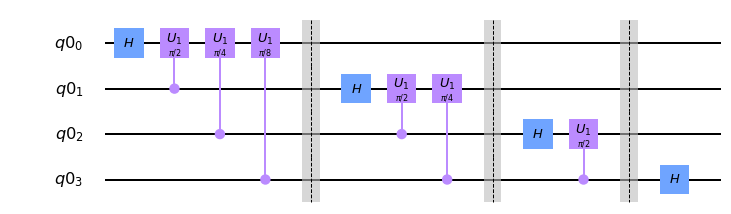

In [7]:
qc = QuantumCircuit(q)
#-------------------
qc.h(0)
qc.cu1(pi/2,q[1],q[0])
qc.cu1(pi/4,q[2],q[0])
qc.cu1(pi/8,q[3],q[0])
#-------------------
qc.barrier()
qc.h(1)
qc.cu1(pi/2,q[2],q[1])
qc.cu1(pi/4,q[3],q[1])
#-------------------
qc.barrier()
qc.h(2)
qc.cu1(pi/2,q[3],q[2])
#-------------------
qc.barrier()
qc.h(3)
#-------------------
qc.draw(output='mpl')

Now, we can define a device (or backend) to run the circuit on, create a quantum program for execution, and store the result of the job we executed. 

In [8]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

In [9]:
# Create a Quantum Program for execution
job = execute(qc, backend)

In [10]:
result = job.result()

Now, we can print the state vector that results from running this circuit. 

In [11]:
outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)

[0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j
 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j 0.25+0.j]


This is a $2^4=16$ dimensional vector, which is expected since we are working with a four-qubit quantum circuit.  

### Exercises

1. Define a QuantumRegister in QISKit with three qubits. 
2. Define the Quantum Fourier Transform circuit for this three qubit system and draw the output circuit. Be sure to use barriers in the appropriate places. You will only need two controlled-$U_1$ gates. They correspond to the following gates, 

\begin{align}
R_2 = \begin{pmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^2}
\end{pmatrix}, \quad 
R_3 = \begin{pmatrix}
1 & 0 \\
0 & e^{2 \pi i /2^3}
\end{pmatrix}
\end{align}

3. Define a device (or backend) to run this circuit on using Aer, create a job, store the result, and print the state vector that results from running this circuit. 

## Applications

The Quantum Fourier Transform, which is essentially a discrete Fourier transform, has many applications. One thing to note is that quantum computers can implement the Quantum Fourier Transform using $O(n^2)$ gates. The best classical algorithms for implementing a disctrete Fourier transform on $2^n$ elements are algorithms like the **[Fast Fourier Transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform)**, which computes the disctrete Fourier transform on $2^n$ elements in $O(n2^n)>>O(n^2)$ logic gates, much greater than the $O(n^2)$ gates for a quantum computer computing the QFT. So, we use exponentially more gates on a classical computer. Finding applications of this exponential speedup then should be considered highly important. 

### Phase Estimation

Phase estimation is described by Nielson and Chuang (pg. 245) as follows.

> "Let $|u\rangle$ be an eigenstate of some unitary operator $U$, with eigenvalue $e^{2\pi i \phi}$. Starting from the initial state $|0\rangle^{\otimes t}|u\rangle$, and given the ability to efficiently perform $U^{2^k}$ for some integer $k$, this algorithm can be used to efficiently obtain state $|\tilde{\phi}\rangle |u\rangle$, where $\tilde{\phi}$ accurately approximates $\phi$ to $t-\lceil \log(2+\frac{1}{2\epsilon}) \rceil$ bits with probability at least $1 - \epsilon$." 

The schematic for the phase estimation circuit is:

![phase_estimation_1.png](phase_estimation_1.png)

\begin{quantikz}
\lstick{$\ket{0}^{\otimes t}$} & \gate{H^j} \qwbundle{t} & \ctrl{1} & \gate{FT^{\dagger}} & \meter{} & \\
\lstick{$\ket{u}^{\otimes m}$} & \qw \qwbundle{m}        & \gate{U^{2^j}} & \qw       & \qw  & \qw \ket{u}
\end{quantikz}

The gate $FT^{\dagger}$ is the inverse Quantum Fourier Transform. The top wire represents $t$-qubits and is actually a bundle of $t$-wires, with qubits in the initial state $|0\rangle$. The bottom wire is again a bundle of $m$-wires on $m$-qubits in state $|u\rangle$, the eigenstate of the unitary operator $U$ with eigenvalue $e^{2 \pi i \phi}$. The operator $H^j = H^{\otimes t}$ is meant to indicate a series (or tensor product) of Hadamard gates on the first $j = 1, 2, ..., t$ qubits, and the controlled-$U^j$ gate is meant to indicate the application of successive controlled-$U^j$ gates for $2^j = 2^0, 2^1, 2^2, ..., 2^{t-1}$. This notation might be a bit confusing so let's look at an example with $t=3$ qubits on the first register, and the same number on the second register. The first part of the circuit, prior to the Quantum Fourier Transform is as follws:

![phase_est_3_qubits.png](phase_est_3_qubits.png)

\begin{quantikz}
\lstick{$\ket{0}$} & \gate{H} & \qw        & \qw      & \ctrl{3} & \qw \ket{0} + e^{2 \pi i (2^2 \phi)}\ket{1}\\
\lstick{$\ket{0}$} & \gate{H} & \qw        & \ctrl{2} & \qw      & \qw \ket{0} + e^{2 \pi i (2^1 \phi)}\ket{1}\\
\lstick{$\ket{0}$} & \gate{H} & \ctrl{1}   & \qw      & \qw      & \qw \ket{0} + e^{2 \pi i (2^0 \phi)}\ket{1} \\
\lstick{$\ket{u}$} & \qw  \qwbundle[alternate]{} & \gate{U^{2^0}} \qwbundle[
alternate]{} & \gate{U^{2^1}} \qwbundle[
alternate]{} & \gate{U^{2^2}} \qwbundle[
alternate]{} & \qwbundle[
alternate]{} \ket{u}
\end{quantikz}

The superposition states on the right hand side must also be multiplied by a normalization factor of $1/2^{3/2}$. The next part of the circuit applies the *inverse* Quantum Fourier Transform $FT^{\dagger}$ to the first three qubits. This circuit will work for phase estimation using a unitary operator $U$ that is $2^3 \times 2^3 = 8 \times 8$. We can devise a somewhat simpler example for a smaller controlled $U$ by choosing 

\begin{align}
U_1 = 
\begin{pmatrix}
1 & 0 \\
0 & e^{i \lambda}
\end{pmatrix}
\end{align}

Let's have a look at how to construct the first part of this circuit in QISKit for this choice of $U$. First, let's define a four-qubit quantum register, with a three-bit classical register, and apply a Hadamard gate to the first three qubits, followed by a barrier. 

In [12]:
qr = QuantumRegister(4)
cr = ClassicalRegister(3)

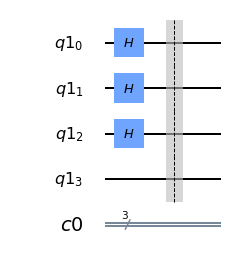

In [13]:
qc2 = QuantumCircuit(qr, cr)
#-------------------
qc2.h(0)
qc2.h(1)
qc2.h(2)
qc2.barrier()
#-------------------
qc2.draw(output='mpl')

Now, we need to apply the controlled-$U_1$ gate a total of $2^3-1 = 7$ times to the fourth qubit, with the control qubit going sequentially upward along the third, second, and first qubit. Each time we step up a qubit, we apply the controlled-$U_1$ gate twice as many times. Let's choose a value of $\lambda = \pi/2$. 

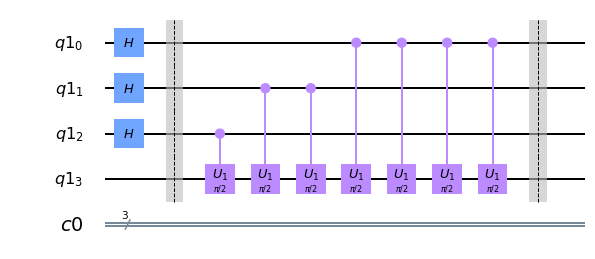

In [14]:
qc2.cu1(pi/2,qr[2],qr[3])
qc2.cu1(pi/2,qr[1],qr[3])
qc2.cu1(pi/2,qr[1],qr[3])
qc2.cu1(pi/2,qr[0],qr[3])
qc2.cu1(pi/2,qr[0],qr[3])
qc2.cu1(pi/2,qr[0],qr[3])
qc2.cu1(pi/2,qr[0],qr[3])
qc2.barrier()
qc2.draw(output='mpl')

As we can see, we applied the controlled-$U_1$ gate $2^0 = 1$ time with the control qubit equal to the thrid qubit. We then applied the controlled-$U_1$ gate $2^1 = 2$ times to with the control qubit equal to the second qubit. Finally, we applied it $2^2 = 4$ times with the control qubit equal to the first qubit. The next part of the algorithm is to apply the *inverse* Quantum Fourier transform to the first three qubits. Let's build this circuit separately and then we can simple adjoin it to our circuit `qc2` above. First, let's import `math`. 

In [15]:
import math

Next, we define a `QuantumCircuit()` with the same four-qubit quantum register and three-qubit classical register as the circuit `qc2`. 

In [16]:
qc3 = QuantumCircuit(qr, cr)

Now, we are going to define a function that performs the *inverse* Quantum Fourier Transform for a given circuit `circ` and for the first n-qubits in `circ`. 

In [17]:
def qft_dagger(circ, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cu1(-math.pi/float(2**(j-m)), m, j)
        circ.h(j)

Okay, now we apply this function to our circuit `qc3` defined above on the first $n=3$ qubits. 

In [18]:
qc3.barrier()
# Apply inverse QFT
qft_dagger(qc3, 3)
# Measure
qc3.barrier()
for n in range(3):
    qc3.measure(n,n)

Now, let's draw our circuit. 

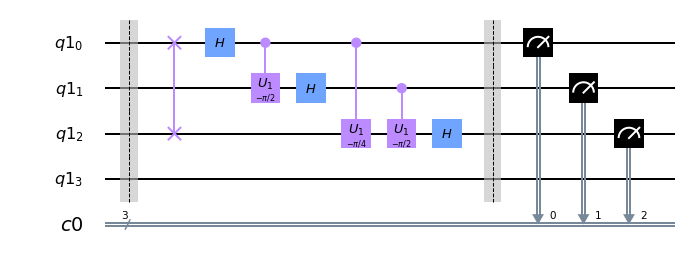

In [19]:
qc3.draw(output='mpl')

Okay, finally let's adjoin `qc3` to the end of `qc2` and then draw the resulting circuit. 

In [20]:
circuit = qc2+qc3

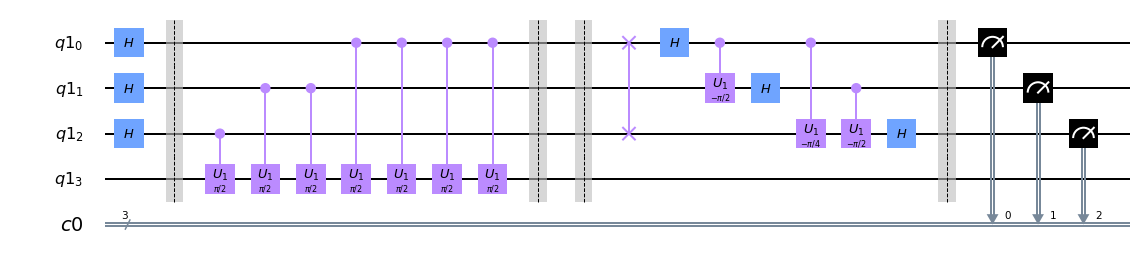

In [21]:
circuit.draw(output='mpl')

### Exercises

Now, for our circuit `circuit` which was `qc2+qc3` we chose an eigenstate $|u\rangle = |0\rangle$ for the controlled-$U_1$ gate. However, we could have also chosen the eigenvector $|1\rangle$, with has eigenvalue $e^{i \lambda}$ with out choice of $\lambda = \pi/2$. 

1. Reconstruct the circuit above for phase estimation, but for $|u\rangle = |1\rangle$. To do this, you will need to flip the spin-up state $|0\rangle$ into the spin-down state $|1\rangle$. Which gate operation will you need to apply in order to initialize the fourth qubit to be in state $|1\rangle$?

2. Recall, for $t$ qubits we can estimate the value $\phi$ for the eigenvalue $e^{2 \pi i \phi}$ with accuracy $t-\lceil \log(2+\frac{1}{2\epsilon}) \rceil$. Compute the accuracy we achieve with the above circuit ($t=3$). 

3. Compute the accuracy if we have $t=4$ qubits. For an example of the accuracy improvement for different choices of $U$ see the [Qiskit documentation](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html).

### Order-Finding and Factoring

The phase estimation algorithm can be used to solve two important problems, **order-finding** and **factoring**. Efficient implementations of these two applications can be used to break RSA public-key cryptography. These two applications, according to Nielson and Chuange (pg. 226), provide evidence that quantum computers may be inherently more powerful than classical computers and they give reason to doubt the strong Church-Turing thesis. 

To understand order-finding we need some basic number theory. Let $x$ and $N$ be positive integers with no common factors. We define the **order of $x$ modulo $N$** to be the smallest positive integer $r$ such that 

\begin{align}
x^r = 1 (\textbf{mod} \ N).
\end{align}

Finding the order $r$ of two given integers $x$ and $N$ is believed to be hard. In particular, there is no known algorithm that can solve the problem with a polynomial amount of resources in the $O(L)$ bits needed to specify the problem. Here, $L = \lceil \log(N) \rceil$ is the number of bits used to specify the integer $N$. Now, the quantum algorithm used to for order-finding is the phase estimation algorithm applied to the unitary operator

\begin{align}
U|y\rangle = |xy (\textbf{mod} \ N)\rangle, 
\end{align}

where $y \in \{0,1\}^L$. The eigenstates of the operator $U$ are, 

\begin{align}
|u_s\rangle = \frac{1}{\sqrt{r}} \sum_{k=0}^{r-1}e^{(-2\pi i sk)/r}|x^k (\textbf{mod} \ N)\rangle. 
\end{align}

The eigenvalues can be found via the following calculation,

\begin{align}
U|u_s\rangle &= \frac{1}{\sqrt{r}} \sum_{k=0}^{r-1}e^{(-2\pi i sk)/r}|x^{k+1} (\textbf{mod} \ N)\rangle \\
&= e^{2 \pi is/r}|u_s\rangle.
\end{align}

Here $0 \leq s \leq r-1$. The quantum circuit for the order-finding algorithm is as follows:

![order_finding_circuit.png](order_finding_circuit.png)

\begin{quantikz}
\lstick{$\ket{0}^{\otimes t}$} & \gate{H^{\otimes t}}\qwbundle{t} & \ctrl{1}           & \gate{FT^{\dagger}} & \meter{}\\
\lstick{$\ket{1}^{\otimes L}$} & \qw \qwbundle{L}                 & \gate{x^j (mod N)} & \qw                 & \qw 
\end{quantikz}

This circuit can also be used for factoring. The gate $FT^{\dagger}$ is the inverse Quantum Fourier Transform. 

## Creating Python Functions to Compute Phase Estimation, QFT, and QFT$^{\dagger}$

In this section we are going to construct three functions that operate on quantum circuits. First, we are going to construct a Python function to prepare the phase estimation algorithm. Next, we'll construct a function that performs the Quantum Fourier Transform. Finally, we will build a function that performs the Inverse Quantum Fourier Transform. 

In [22]:
from qiskit import *

### Phase Estimation

In [23]:
def phase_est(circ, n):
    """Phase estimation on n-qubits"""
    for m in range(n-1):
        circ.h(m)
    circ.barrier()
    for j in range(n-1):
        circ.cu1(math.pi/float(2**j), n-2-j, n-1)

Let's test it out on a five qubit circuit. 

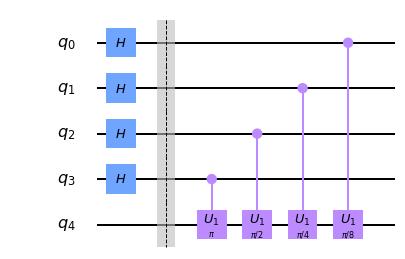

In [24]:
qc = QuantumCircuit(5)
phase_est(qc, 5)
qc.draw(output='mpl')

### Quantum Fourier Transform

In [25]:
def qft(circ, n):
    """n-qubit Quantum Fourier Transform"""
    for j in range(n-1):
        circ.barrier()
        circ.h(j)
        for m in range(n-j-1):
            circ.cu1(math.pi/float(2**(m+1)), j+m+1, j)

Let's test this function out on another five qubit circuit. 

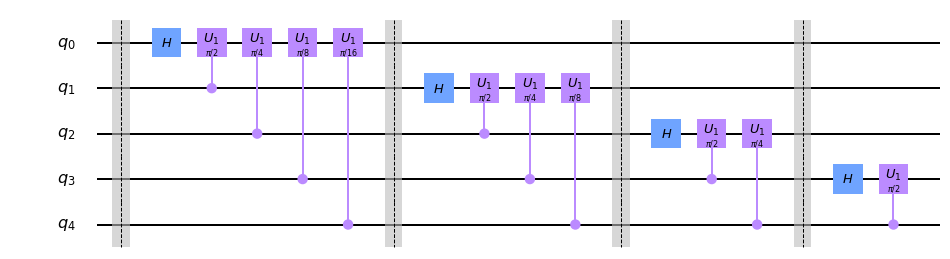

In [26]:
qc2 = QuantumCircuit(5)
qft(qc2, 5)
qc2.draw(output='mpl')

### Inverse Quantum Fourier Transform

In [27]:
def qft_dagger(circ, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        circ.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circ.cu1(-math.pi/float(2**(j-m)), m, j)
        circ.h(j)
        circ.barrier()

Let's test it on a five qubit circuit. 

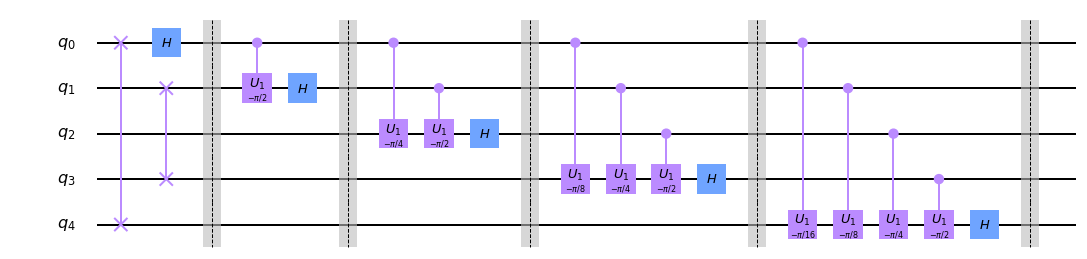

In [28]:
qc3 = QuantumCircuit(5)
qft_dagger(qc3, 5)
qc3.draw(output='mpl')

### Exercises

1. Create a four qubit quantum circuit named `qc1`. Use the `qft` function on `qc1`. 
2. Create a four qubit quantum circuit named `qc2`. Use the `qft_dagger` function on `qc2`.
3. Create a circuit `circ1 = qc1+qc2` that performs the QFT and inverse QFT. 
4. Run `circ1` on the `statevector_simulator` in QISKit and print the state vector. Does this state vector make sense?
5. Construct a circuit `qc3` on four qubits and apply the `phase_est` function to it. 
6. Explain why this is equivalent to the following circuit (Hint: What is the result of multiple applications of the $U_1$ gate or the controlled-$U_1$ gate?):

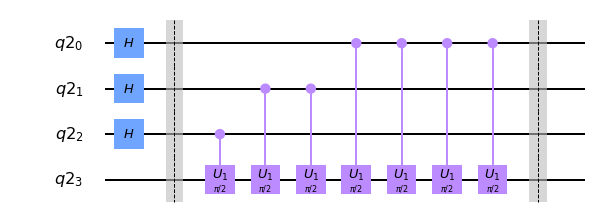

In [29]:
qr = QuantumRegister(4)
qc3 = QuantumCircuit(qr)
#-------------------
qc3.h(0)
qc3.h(1)
qc3.h(2)
qc3.barrier()
#-------------------
qc3.cu1(pi/2,qr[2],qr[3])
qc3.cu1(pi/2,qr[1],qr[3])
qc3.cu1(pi/2,qr[1],qr[3])
qc3.cu1(pi/2,qr[0],qr[3])
qc3.cu1(pi/2,qr[0],qr[3])
qc3.cu1(pi/2,qr[0],qr[3])
qc3.cu1(pi/2,qr[0],qr[3])
qc3.barrier()
qc3.draw(output='mpl')